# **Klasifikasi Buah**

**Sekolah = SMK Negeri 1 Surabaya**

**Nama Peserta = M. Shofian Najib & Davino Edric F.**

**No. Peserta =**

# **Import Library**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **A. Exploratory Data Analysis (EDA)**

In [138]:
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## **A.1 Dimensi Data**

In [139]:
df.shape

(59, 7)

Dataset ini memiliki **59 baris** dan **7 kolom**

## **A.2 Info Data**

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


Dataset ini memiliki :
- 5 kolom numerikal
- 2 kolom kategorikal

## **A.3 Nilai Hilang**

In [141]:
df.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

Tidak ada nilai hilang dalam dataset

## **A.4 Data Duplikat**

In [142]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat dalam dataset

In [143]:
num_cols = df.select_dtypes('number')
cat_cols = df.select_dtypes('object')

## **A.5 Kolom Numerikal**

### **A.5.1 Deskripsi Data**

In [144]:
round(num_cols.describe(), 2)

,fruit_label,mass,width,height,color_score
count,59.00,59.00,59.00,59.00,59.00
mean,2.54,163.12,7.11,7.69,0.76
std,1.21,55.02,0.82,1.36,0.08
min,1.00,76.00,5.80,4.00,0.55
25%,1.00,140.00,6.60,7.20,0.72
50%,3.00,158.00,7.20,7.60,0.75
75%,4.00,177.00,7.50,8.20,0.81
max,4.00,362.00,9.60,10.50,0.93


Kita dapat mengetahui :
- Rata - rata
- Standar deviasi
- Nilai minimal
- Quartil 1
- Nilai tengah
- Quartil 3
- Nilai maksimal

### **A.5.2 Variansi**

In [145]:
for col in num_cols:
    print(f'Variansi Kolom {col} : {round(num_cols[col].var(), 2)}')

Variansi Kolom fruit_label : 1.46
Variansi Kolom mass : 3027.07
Variansi Kolom width : 0.67
Variansi Kolom height : 1.85
Variansi Kolom color_score : 0.01


### **A.5.3 Interquartile Range (IQR)**

In [146]:
for col in num_cols:
    print(f'IQR Kolom {col} : {round(num_cols[col].quantile(0.75) - num_cols[col].quantile(0.25), 2)}')

IQR Kolom fruit_label : 3.0
IQR Kolom mass : 37.0
IQR Kolom width : 0.9
IQR Kolom height : 1.0
IQR Kolom color_score : 0.09


### **A.5.4 Range**

In [147]:
for col in num_cols:
    print(f'Range Kolom {col} : {round(num_cols[col].max() - num_cols[col].min(), 2)}')

Range Kolom fruit_label : 3
Range Kolom mass : 286
Range Kolom width : 3.8
Range Kolom height : 6.5
Range Kolom color_score : 0.38


### **A.5.5 Histogram dan Boxplot**

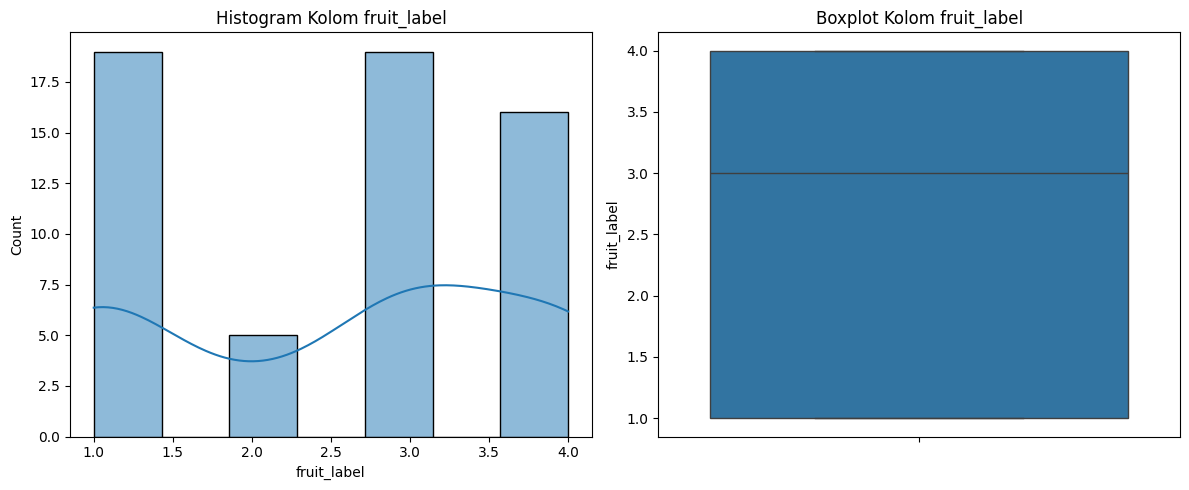

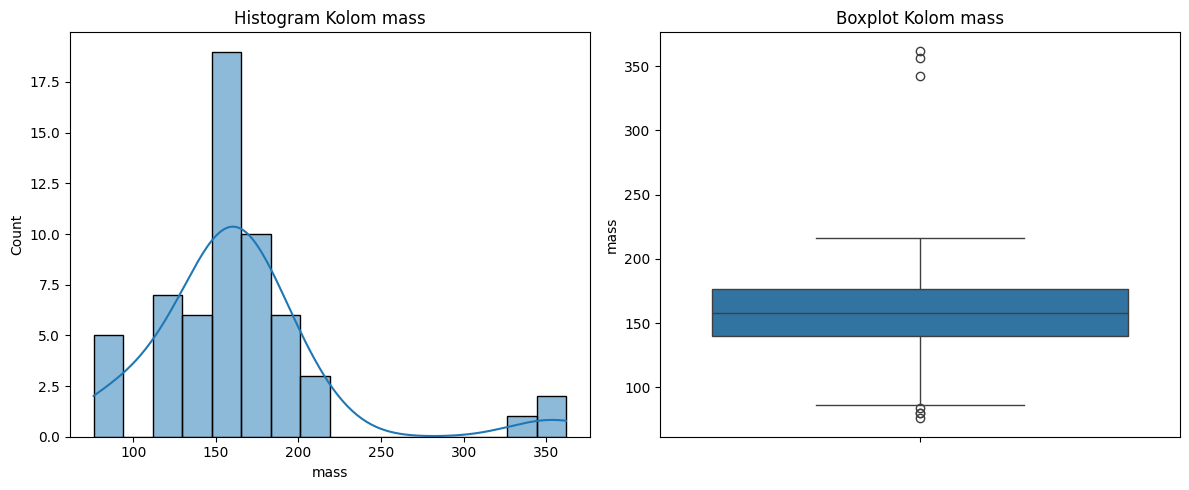

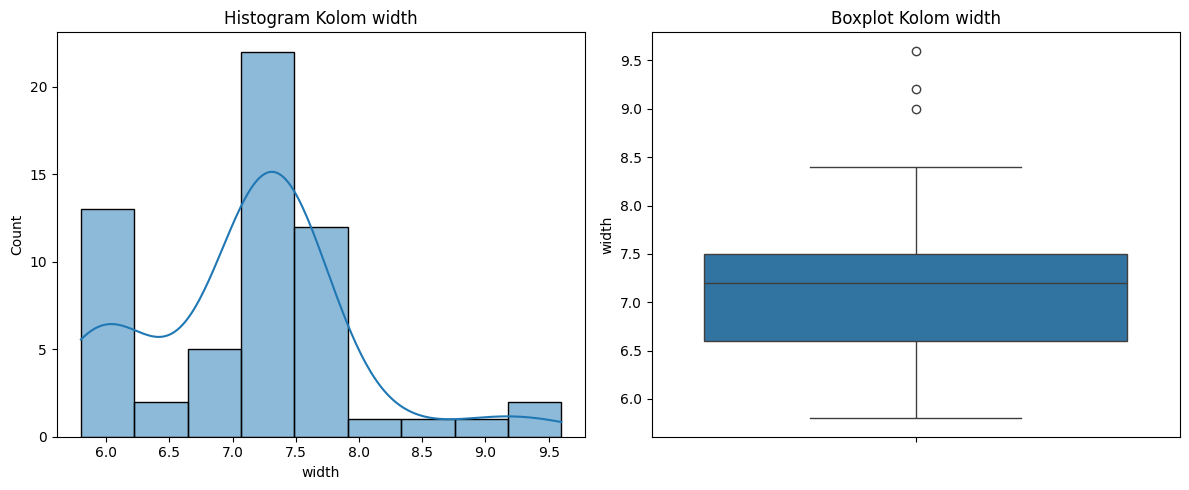

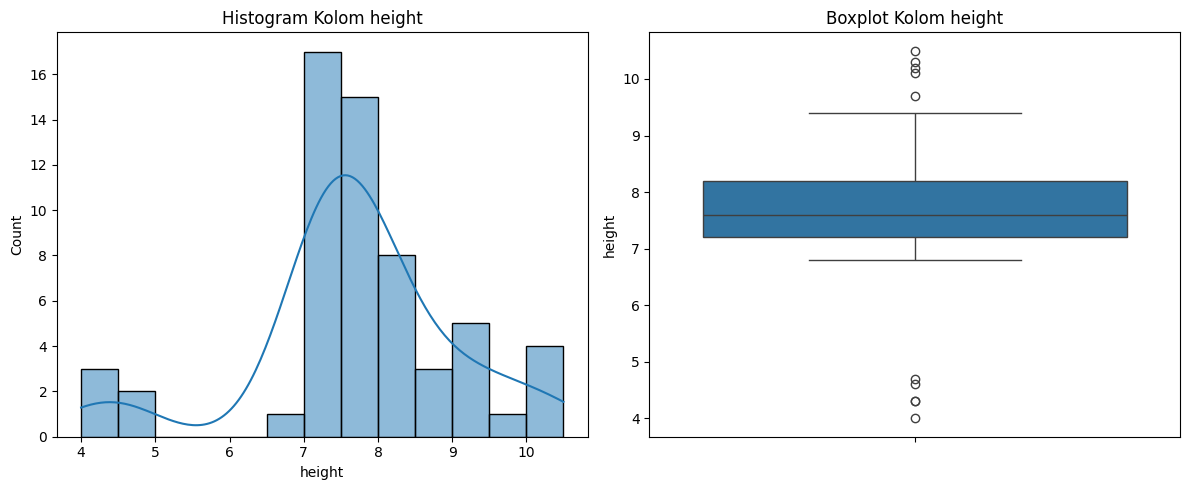

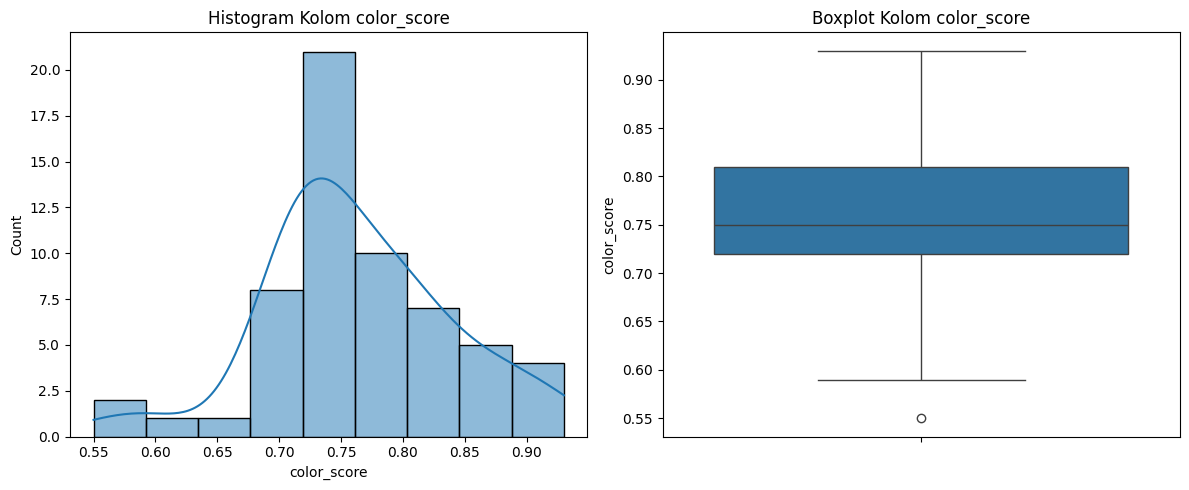

In [148]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(num_cols[col], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram Kolom {col}')
    sns.boxplot(num_cols[col], ax=axes[1])
    axes[1].set_title(f'Boxplot Kolom {col}')
    plt.tight_layout()
    plt.show()

Terdapat beberapa kolom yang memiliki outlier

### **A.5.6 Outlier**

#### **A.5.6.1 Berdasarkan IQR**

In [149]:
outlier_iqr = {}
for col in num_cols:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    outlier_iqr[col] = num_cols[col][(num_cols[col] < lwr) | (num_cols[col] > upr)].shape[0]

outlier_iqr

{'fruit_label': 0, 'mass': 7, 'width': 3, 'height': 10, 'color_score': 1}

#### **A.5.6.2 Berdasarkan Z-Score**

In [150]:
outlier_z = {}
treshold = 2
for col in num_cols:
    z = (num_cols[col] - num_cols[col].mean()) / num_cols[col].std()
    outlier_z[col] = z[abs(z) > treshold].shape[0]

outlier_z

{'fruit_label': 0, 'mass': 3, 'width': 3, 'height': 6, 'color_score': 6}

### **A.5.7 Heatmap**

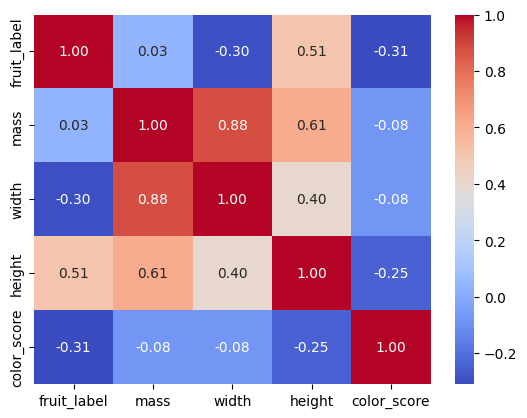

In [151]:
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Terdapat beberapa kolom yang berkorelasi tinggi dan rendah

## **A.6 Kolom Kategorikal**

### **A.6.1 Deskripsi Data**

In [152]:
cat_cols.describe()

,fruit_name,fruit_subtype
count,59,59
unique,4,10
top,apple,turkey_navel
freq,19,10


### **A.6.2 Nilai Unik**

In [153]:
for col in cat_cols:
    print(f'Kolom {col} : {cat_cols[col].unique()}\n')

Kolom fruit_name : ['apple' 'mandarin' 'orange' 'lemon']

Kolom fruit_subtype : ['granny_smith' 'mandarin' 'braeburn' 'golden_delicious' 'cripps_pink'
 'spanish_jumbo' 'selected_seconds' 'turkey_navel' 'spanish_belsan'
 'unknown']



### **A.6.3 Jumlah Nilai Unik per Kolom**

In [154]:
for col in cat_cols:
    print(f'Kolom {col} : {cat_cols[col].nunique()}\n')

Kolom fruit_name : 4

Kolom fruit_subtype : 10



### **A.6.4 Jumlah per Nilai Unik**

In [155]:
for col in cat_cols:
    print(f'Kolom {col} : {cat_cols[col].value_counts()}\n')

Kolom fruit_name : fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

Kolom fruit_subtype : fruit_subtype
turkey_navel        10
unknown             10
spanish_belsan       6
selected_seconds     6
cripps_pink          6
mandarin             5
golden_delicious     5
braeburn             5
granny_smith         3
spanish_jumbo        3
Name: count, dtype: int64



### **A.6.5 Countplot**

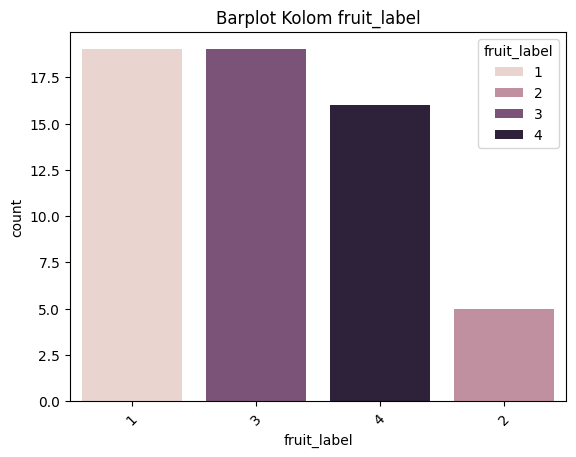

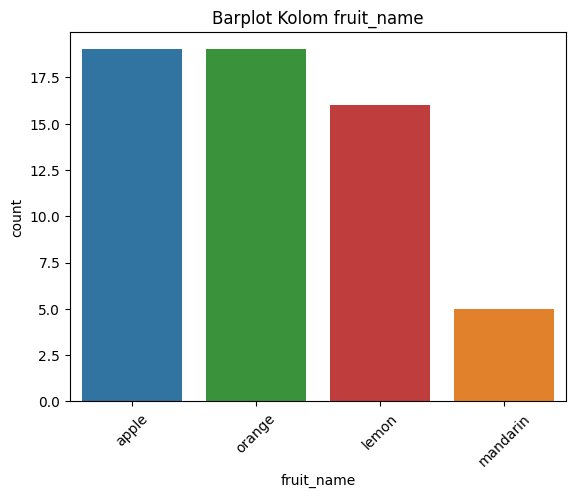

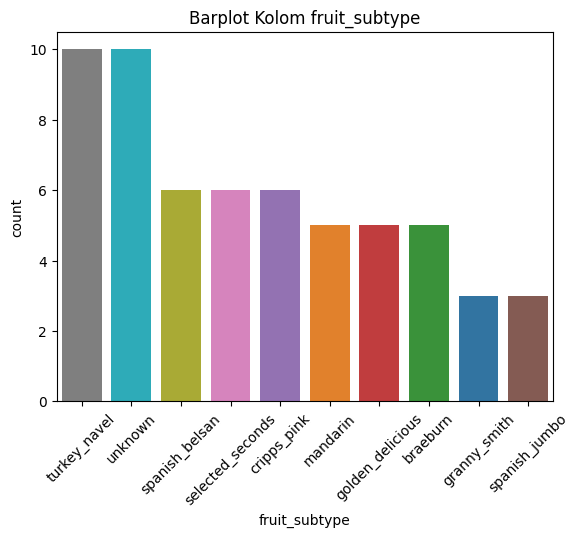

In [156]:
for col in df[['fruit_label', 'fruit_name', 'fruit_subtype']]:
    sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index)
    plt.title(f'Barplot Kolom {col}')
    plt.xticks(rotation=45)
    plt.show()

## **A.7 Visualisasi Kolom Kategorikal vs Kolom Label**

### **A.7.1 Countplot**

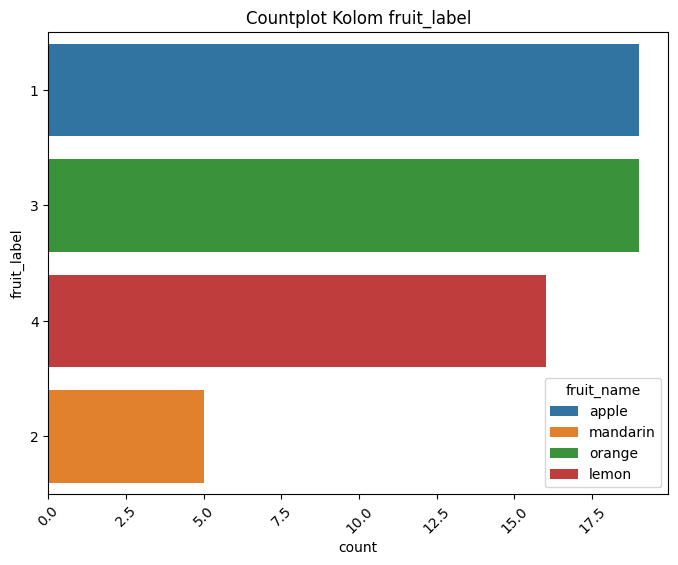

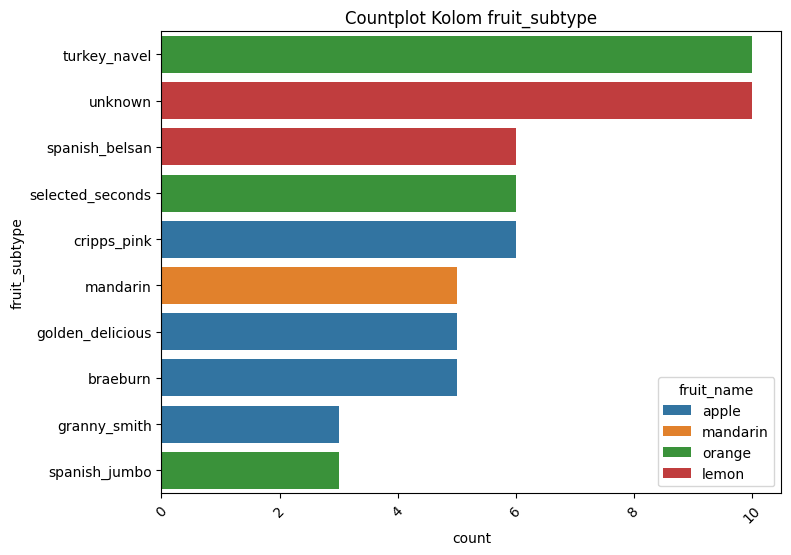

In [157]:
for col in df[['fruit_label', 'fruit_name', 'fruit_subtype']]:
    if col != 'fruit_name':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, y=col, hue='fruit_name', orient='h', order=df[col].value_counts().index)
        plt.title(f'Countplot Kolom {col}')
        plt.xticks(rotation=45)
        plt.show()

## **A.8 Visualisasi Kolom Numerikal vs Kolom Label**

### **A.8.1 Boxplot**

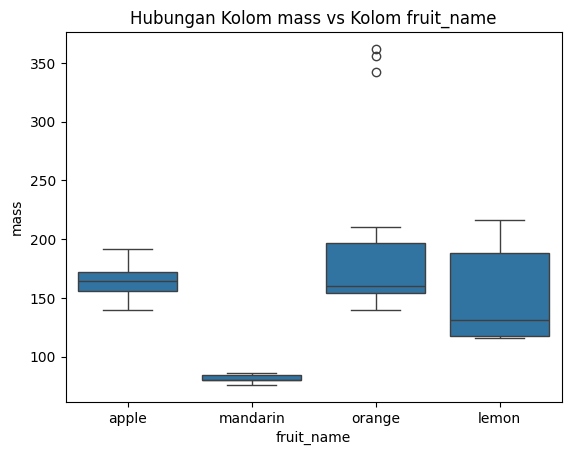

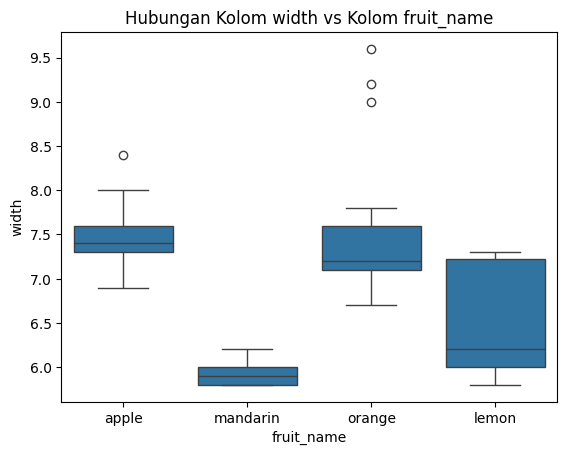

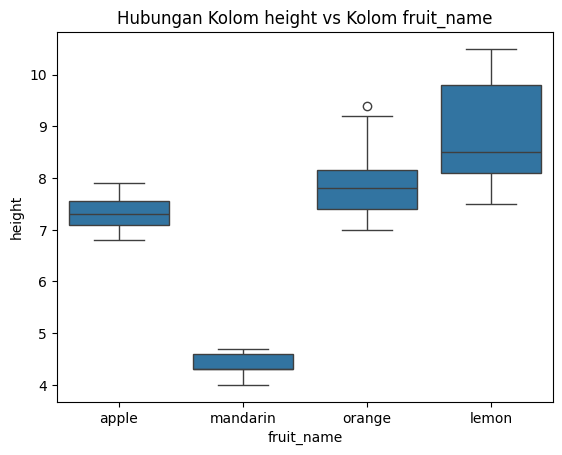

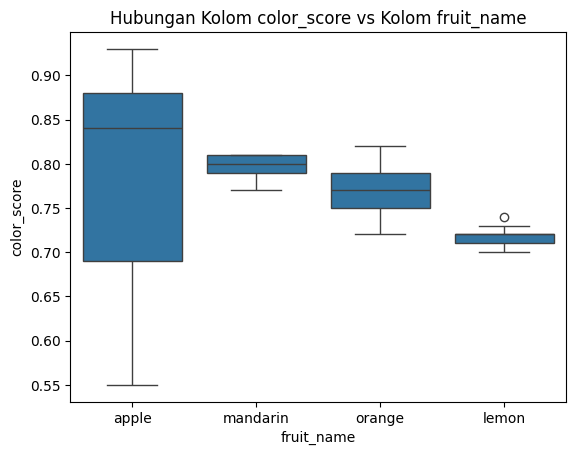

In [158]:
for col in df[['mass', 'width', 'height', 'color_score', 'fruit_name']]:
    if col != 'fruit_name':
        sns.boxplot(data=df, y=col, x='fruit_name')
        plt.title(f'Hubungan Kolom {col} vs Kolom fruit_name')
        plt.show()

# **B. Data Pre-processing**

## **B.1 Hapus Kolom**

In [159]:
df.drop(columns='fruit_name', inplace=True)

## **B.2 Menangani Outlier**

In [160]:
for col in df.select_dtypes('number'):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    median_val = df[col].median()
    df[col] = df[col].apply(lambda x: median_val if x < lwr or x > upr else x)
    outlier_iqr[col] = df[col][(df[col] < lwr) | (df[col] > upr)].shape[0]

outlier_iqr

{'fruit_label': 0, 'mass': 0, 'width': 0, 'height': 0, 'color_score': 0}

## **B.3 Mapping**

In [161]:
mappings = {}
mappings[col] = {k: v for v, k in enumerate(df['fruit_subtype'].unique())}
df['fruit_subtype'] = df['fruit_subtype'].map(mappings[col])

mappings

{'color_score': {'granny_smith': 0,
  'mandarin': 1,
  'braeburn': 2,
  'golden_delicious': 3,
  'cripps_pink': 4,
  'spanish_jumbo': 5,
  'selected_seconds': 6,
  'turkey_navel': 7,
  'spanish_belsan': 8,
  'unknown': 9}}

## **B.4 Heatmap**

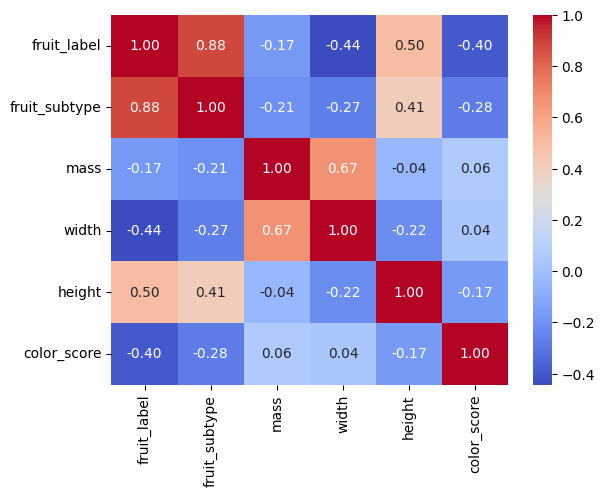

In [162]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## **B.5 Fitur dan Kelas**

In [163]:
x = df.drop(columns='fruit_label')
y = df['fruit_label']

## **B.6 Membagi Data**

In [164]:
def strat_split(x, y, test_size=0.2, stratify=None, random_state=42):
    stratify = stratify if stratify is not None else y
    np.random.seed(random_state)
    x = np.array(x)
    y = np.array(y)
    stratify = np.array(stratify)
    unique_classes, y_indices = np.unique(stratify, return_inverse=True)
    test_indices = []
    train_indices = []
    for class_index in range(len(unique_classes)):
        class_indices = np.where(y_indices == class_index)[0]
        np.random.shuffle(class_indices)
        n_test = int(len(class_indices) * test_size)
        test_indices.extend(class_indices[:n_test])
        train_indices.extend(class_indices[n_test:])

    test_indices = np.array(test_indices)
    train_indices = np.array(train_indices)
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = strat_split(x, y, test_size=0.2, stratify=y)
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (49, 5)
x_test shape : (10, 5)
y_train shape : (49,)
y_test shape : (10,)


## **B.7 Normalisasi**

In [165]:
epsilon = 1e-10
def normalisasi(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    denominator = max_val - min_val
    denominator[denominator == 0] += epsilon
    train_scaled = (train - min_val) / denominator 
    test_scaled = (test - min_val) / denominator 
    return train_scaled, test_scaled

x_train_scaled, x_test_scaled = normalisasi(x_train, x_test)

## **B.8 Oversampling**

In [166]:
print(pd.Series(y_train).value_counts())

1    16
3    16
4    13
2     4
Name: count, dtype: int64


In [167]:
def oversampling(x, y, k=5, random_state=42):
    np.random.seed(random_state)
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_sample = x[class_indices]
            n_samples_to_generate = max_class_count - class_counts[class_label]
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                distances = np.linalg.norm(class_sample - sample, axis=1)
                nearest_neighbour = np.argsort(distances)[1:k+1]
                neighbour_index = np.random.choice(nearest_neighbour)
                neighbour = class_sample[neighbour_index]
                diff = neighbour - sample
                synthetic_sample = sample + np.random.rand() * diff
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)

    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = oversampling(x_train_scaled, y_train, k=5)

In [168]:
print(pd.Series(y_train_resampled).value_counts())

1    16
2    16
3    16
4    16
Name: count, dtype: int64


# **C. Implementasi Model KNN**

## **C.1 Model KNearest Neighbour**

In [169]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

class KNeighborsClassifierManual:
    def __init__(self, n_neighbors=5, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def _distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean_distance(a, b)
        elif self.metric == 'manhattan':
            return manhattan_distance(a, b)
        elif self.metric == 'minkowski':
            return minkowski_distance(a, b, self.p)
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

## **C.2 Cross-Validation**

In [170]:
def cross_val_score_knn(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

## **C.3 Grid Search**

In [171]:
def grid_search_knn(X_train, y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    for n_neighbors in param_grid['n_neighbors']:
        for metric in param_grid['metric']:
            for p in param_grid.get('p', [3]):
                knn = KNeighborsClassifierManual(n_neighbors=n_neighbors, metric=metric, p=p)
                scores = cross_val_score_knn(knn, X_train, y_train, cv=cv)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'p': p}
    return best_params, best_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3, 4, 5] 
}

In [172]:
best_params, best_score = grid_search_knn(x_train_resampled, y_train_resampled, param_grid, cv=5)
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

Best parameters: {'n_neighbors': 3, 'metric': 'manhattan', 'p': 1}
Best cross-validation score: 0.9692307692307693


## **C.4 Inisialisasi Model KNN**

In [173]:
knn = KNeighborsClassifierManual(**best_params)
knn.fit(x_train_resampled, y_train_resampled)
pred = knn.predict(x_test_scaled) 

# **D. Evaluasi Model**

## **D.1 Akurasi**

In [174]:
accuracy = np.mean(pred == y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 0.9


## **D.2 Classification Report**

In [175]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

report_knn = precision_recall_f1_support(y_test, pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
1          1.00       1.00       1.00       3         
2          1.00       1.00       1.00       1         
3          0.75       1.00       0.86       3         
4          1.00       0.67       0.80       3         
macro avg  0.94       0.92       0.91       10        


## **D.3 Confusion Matrix**

In [176]:
def confusion_matrix_manual(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    
    label_to_index = {label: index for index, label in enumerate(labels)}
    
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1
    
    return matrix, labels

def print_confusion_matrix(matrix, labels):
    print(f"{'':<10}", end="")
    for label in labels:
        print(f"{label:<10}", end="")
    print()
    
    for i, label in enumerate(labels):
        print(f"{label:<10}", end="")
        for j in range(len(labels)):
            print(f"{matrix[i, j]:<10}", end="")
        print()

matrix, labels = confusion_matrix_manual(y_test, pred)
print_confusion_matrix(matrix, labels)

          1         2         3         4         
1         3         0         0         0         
2         0         1         0         0         
3         0         0         3         0         
4         0         0         1         2         


In [177]:
cv_scores = cross_val_score_knn(knn=knn,X=x_train_resampled,y=y_train_resampled,cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')

Cross-validation scores: [1.         1.         1.         0.84615385 1.        ]
Mean accuracy: 0.9692307692307693
